In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def format_datetime(dt:str) -> datetime.datetime:
    date = datetime.datetime.strptime(dt[:23], '%Y-%m-%d %H:%M:%S.%f')
    return date


weather_data = pd.read_csv(f"dataset/weatherHistory.csv")

data = weather_data.copy(deep=True)
data_date = data['Formatted Date']
data = data.drop(['Formatted Date'], axis=1)

copy_date_data = []
copy_date_index = []
for i, date in enumerate(data_date):
    copy_date_index.append(i)
    copy_date_data.append(format_datetime(date).strftime('%Y-%m-%d'))
    
formatted_date = pd.Series(data=copy_date_data, index=copy_date_index)

data = data.assign(Date=formatted_date)

month = pd.DatetimeIndex(data['Date']).month
year = pd.DatetimeIndex(data['Date']).year
day = pd.DatetimeIndex(data['Date']).day

data = data.assign(Year = year, Month = month, Day = day)


In [8]:
reg = Ridge(alpha=.1)
predictors = ['Temperature (C)']
x_train, x_test, y_train, y_test = train_test_split(data['Month'].to_numpy().reshape(-1, 1), data[predictors], test_size=0.2, random_state=0)

In [9]:
reg.fit(x_train, y_train)
test = LinearRegression().fit(x_train, y_train)
reg.coef_
# x_train, y_train

array([[0.42362436]])

In [51]:
from sklearn.preprocessing import MinMaxScaler
pipeline = make_pipeline(PolynomialFeatures(5), Ridge())
pipeline.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('ridge', Ridge())])

In [43]:
ridg_pred = reg.predict(x_test)
ridg_mse = mean_squared_error(y_test, ridg_pred)

In [44]:
pipe_pred = pipeline.predict(x_test)
pipe_mse = mean_squared_error(y_test, pipe_pred)

In [47]:
print(f"Ridge Mean Error : {ridg_mse} ({ridg_mse/np.mean(ridg_pred)*100:3.3}%)")
print(f"Pipeline Mean Error : {pipe_mse} ({pipe_mse/np.mean(pipe_pred)*100:3.3}%)")
print(f"Ridge Score : {reg.score(x_train, y_train)}")
print(f"Pipeline Score : {pipeline.score(x_train, y_train)}")

Ridge Mean Error : 89.0446665966532 (7.44e+02%)
Pipeline Mean Error : 29.322753729206696 (2.47e+02%)
Ridge Score : 0.023323961584137187
Pipeline Score : 0.6768715932277167


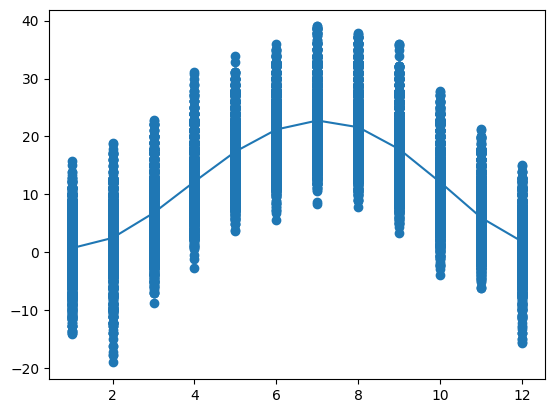

In [54]:
plt.scatter(x_test, y_test)
plt.plot(sorted(x_test), pipeline.predict(sorted(x_test)))
plt.show()